In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#importing matplotlib and seaborn libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#reading csv here
corona_data = pd.read_csv("/content/gdrive/My Drive/2019_nCoV_data.csv")

In [0]:
#showing data in the form of pandas DataFrame
corona_data

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1267,1268,02/11/2020 20:44:00,"Madison, WI",US,2020-02-05 21:53:02,1.0,0.0,0.0
1268,1269,02/11/2020 20:44:00,"Orange, CA",US,2020-02-01 19:53:03,1.0,0.0,0.0
1269,1270,02/11/2020 20:44:00,"San Diego County, CA",US,2020-02-11 01:23:05,1.0,0.0,0.0
1270,1271,02/11/2020 20:44:00,"Seattle, WA",US,2020-02-09 07:03:04,1.0,0.0,1.0


In [0]:
#checking for the null values
corona_data.isnull().sum()

Sno                 0
Date                0
Province/State    332
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [0]:
#replacing null values
corona_data = corona_data.fillna({'Province/State':'Qinghai'})

In [0]:
#we dont need Sno and Last Update so we are dropping those columns

corona_data.drop('Sno',inplace=True,axis=1)
corona_data.drop('Last Update',inplace=True,axis=1)

In [0]:
#printing the information about the Dataframe 
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 6 columns):
Date              1272 non-null object
Province/State    1272 non-null object
Country           1272 non-null object
Confirmed         1272 non-null float64
Deaths            1272 non-null float64
Recovered         1272 non-null float64
dtypes: float64(3), object(3)
memory usage: 59.8+ KB


In [0]:
#describing the statistical measures of the Dataset
corona_data.describe()

,Confirmed,Deaths,Recovered
count,1272.000000,1272.000000,1272.00000
mean,295.830975,6.496069,17.53695
std,2123.883545,63.786463,125.80237
min,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.00000
50%,11.000000,0.000000,0.00000
75%,87.000000,0.000000,3.00000
max,33366.000000,1068.000000,2639.00000


In [0]:
Confirmed_cases=corona_data['Confirmed'].sum()
print(Confirmed_cases)

376297.0


In [0]:
death_cases=corona_data['Deaths'].sum()
print(death_cases)

8263.0


In [0]:
recovery_cases=corona_data['Recovered'].sum()
print(recovery_cases)

22307.0


In [0]:
#Changing datetime into date
corona_data.Date=corona_data.Date.apply(pd.to_datetime)
corona_data.Date=corona_data["Date"].dt.strftime('%m/%d/%Y')

corona_data.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [0]:
#grouping the data with respect to date for better understanding

corona_data_datewise = corona_data.groupby(["Date"],as_index=False)['Confirmed','Deaths','Recovered'].sum()

In [0]:
corona_data_datewise

,Date,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,0.0,0.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,2019.0,56.0,49.0
4,01/26/2020,2794.0,80.0,54.0
5,01/27/2020,4473.0,107.0,63.0
6,01/28/2020,6057.0,132.0,110.0
7,01/29/2020,7783.0,170.0,133.0
8,01/30/2020,9776.0,213.0,187.0
9,01/31/2020,11374.0,259.0,252.0


In [0]:
#Adding number of days to explore the epidemic with respect to time
corona_data_datewise['Days']=np.arange(1,len(corona_data_datewise)+1)
corona_data_datewise

,Date,Confirmed,Deaths,Recovered,Days
0,01/22/2020,555.0,0.0,0.0,1
1,01/23/2020,653.0,18.0,30.0,2
2,01/24/2020,941.0,26.0,36.0,3
3,01/25/2020,2019.0,56.0,49.0,4
4,01/26/2020,2794.0,80.0,54.0,5
5,01/27/2020,4473.0,107.0,63.0,6
6,01/28/2020,6057.0,132.0,110.0,7
7,01/29/2020,7783.0,170.0,133.0,8
8,01/30/2020,9776.0,213.0,187.0,9
9,01/31/2020,11374.0,259.0,252.0,10


In [0]:
#visualization of the corona virus deaths across the world during days 
fig=px.line(corona_data_datewise,x="Days",y="Deaths",range_y=[1,1100])
fig.show()

With the Passage of days we can see that deaths are also increasing

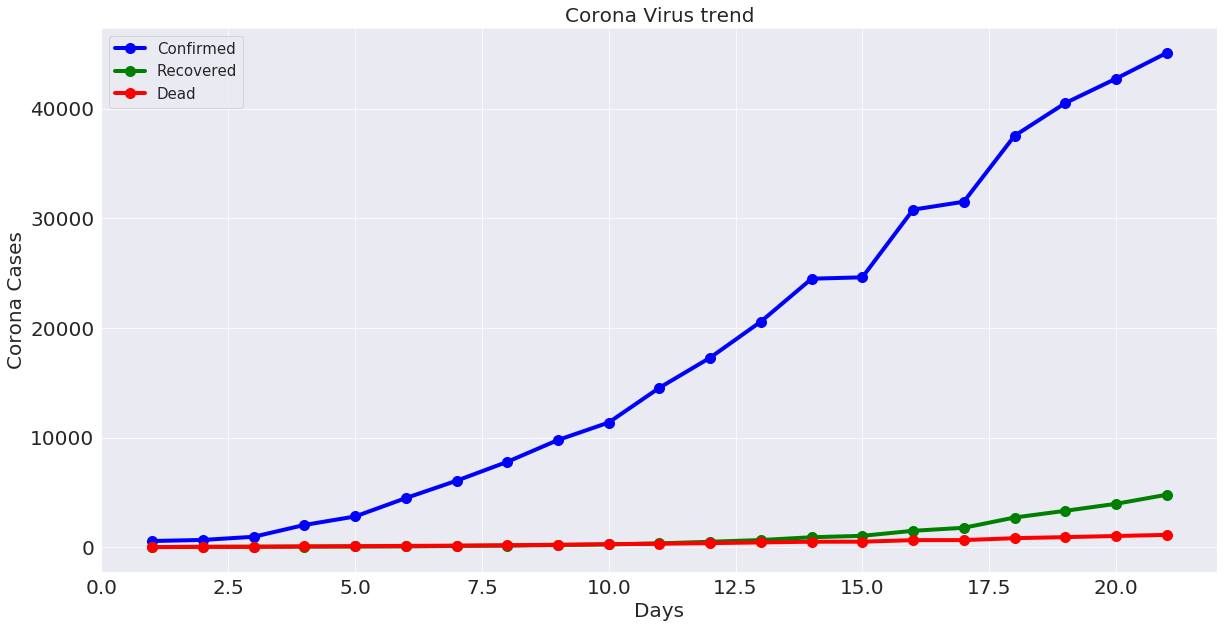

In [0]:
#plotting the relationship between Confirmed,deaths and recovered cases

plt.figure(figsize=(20,10))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("Days",fontsize=20)
plt.ylabel("Corona Cases",fontsize=20)
plt.plot(corona_data_datewise.Days,corona_data_datewise.Confirmed,marker='o',markersize=10,color='blue',linewidth=4)
plt.plot(corona_data_datewise.Days,corona_data_datewise.Recovered,marker='o',markersize=10,color='green',linewidth=4)
plt.plot(corona_data_datewise.Days,corona_data_datewise.Deaths,marker='o',markersize=10,color='red',linewidth=4)
plt.title("Corona Virus trend",fontsize=20)
plt.legend(labels=['Confirmed','Recovered','Dead'],fontsize=15)
plt.show()

In [0]:
#lets group the data country wise and see the effect on each country
corona_data_country = corona_data.groupby('Country',as_index=False)["Confirmed","Deaths","Recovered"].sum()
corona_data_country

,Country,Confirmed,Deaths,Recovered
0,Australia,194.0,0.0,26.0
1,Belgium,8.0,0.0,0.0
2,Brazil,0.0,0.0,0.0
3,Cambodia,16.0,0.0,0.0
4,Canada,73.0,0.0,0.0
5,China,549.0,0.0,0.0
6,Finland,14.0,0.0,1.0
7,France,117.0,0.0,0.0
8,Germany,156.0,0.0,0.0
9,Hong Kong,349.0,8.0,0.0


In [0]:
#Filtering data based on date
virus_data_latest=corona_data[(corona_data["Date"]==corona_data["Date"].max())]
virus_data_latest

,Date,Province/State,Country,Confirmed,Deaths,Recovered
1199,02/11/2020,Hubei,Mainland China,33366.0,1068.0,2639.0
1200,02/11/2020,Guangdong,Mainland China,1219.0,1.0,241.0
1201,02/11/2020,Henan,Mainland China,1135.0,8.0,231.0
1202,02/11/2020,Zhejiang,Mainland China,1131.0,0.0,279.0
1203,02/11/2020,Hunan,Mainland China,946.0,2.0,263.0
...,...,...,...,...,...,...
1267,02/11/2020,"Madison, WI",US,1.0,0.0,0.0
1268,02/11/2020,"Orange, CA",US,1.0,0.0,0.0
1269,02/11/2020,"San Diego County, CA",US,1.0,0.0,0.0
1270,02/11/2020,"Seattle, WA",US,1.0,0.0,1.0


In [0]:
#Visualisation of death cases across countries using a line plot
fig=px.line(corona_data_country,x="Country",y="Deaths",range_y=[1,8000])
fig.show()

In [0]:
#Visualisation of death cases across countries using a line plot
fig=px.bar(corona_data_country,x="Country",y="Deaths")
fig.show()

As we can see China has the most cases so lets go into details of china

In [0]:
virus_province = corona_data.groupby(['Province/State']).agg({'Confirmed': 'sum',
                                                'Deaths': 'sum',
                                                'Recovered': 'sum',
                                                }).reset_index()
virus_province

,Province/State,Confirmed,Deaths,Recovered
0,Anhui,7959.0,11.0,486.0
1,Arizona,6.0,0.0,0.0
2,Bavaria,20.0,0.0,0.0
3,Beijing,3713.0,21.0,339.0
4,"Boston, MA",11.0,0.0,0.0
5,British Columbia,31.0,0.0,0.0
6,California,13.0,0.0,0.0
7,Chicago,1.0,0.0,0.0
8,"Chicago, IL",22.0,0.0,6.0
9,Chongqing,5476.0,23.0,342.0


In [0]:
#lets get  the information by filtering virus_data_latest
virus_data_china=virus_data_latest[virus_data_latest.Country=="Mainland China"].groupby("Province/State",as_index=False)["Confirmed","Deaths","Recovered"].sum()
virus_data_china

,Province/State,Confirmed,Deaths,Recovered
0,Anhui,889.0,4.0,108.0
1,Beijing,342.0,3.0,48.0
2,Chongqing,505.0,3.0,79.0
3,Fujian,272.0,0.0,46.0
4,Gansu,86.0,2.0,24.0
5,Guangdong,1219.0,1.0,241.0
6,Guangxi,222.0,1.0,31.0
7,Guizhou,131.0,1.0,17.0
8,Hainan,151.0,3.0,20.0
9,Hebei,251.0,2.0,48.0


In [0]:
fig = px.bar(virus_data_china, y = 'Province/State', x = 'Confirmed',orientation = 'h', width = 800, height = 600,color='Province/State'  )
fig.show()

In [0]:
fig = px.bar(virus_data_china, y = 'Province/State', x = 'Deaths',orientation = 'h', width = 800, height = 600,color='Province/State'  )
fig.show()

In [0]:
fig = px.bar(virus_data_china, y = 'Province/State', x = 'Recovered',orientation = 'h', width = 800, height = 600,color='Province/State' )
fig.show()

In [0]:
#lets get data based on hubei from main data frame
virus_Hubei=corona_data[corona_data["Province/State"]=="Hubei"]
virus_Hubei

,Date,Province/State,Country,Confirmed,Deaths,Recovered
13,01/22/2020,Hubei,China,444.0,0.0,0.0
51,01/23/2020,Hubei,Mainland China,444.0,17.0,28.0
83,01/24/2020,Hubei,Mainland China,549.0,24.0,31.0
124,01/25/2020,Hubei,Mainland China,1052.0,52.0,42.0
168,01/26/2020,Hubei,Mainland China,1423.0,76.0,44.0
215,01/27/2020,Hubei,Mainland China,2714.0,100.0,47.0
267,01/28/2020,Hubei,Mainland China,3554.0,125.0,80.0
319,01/29/2020,Hubei,Mainland China,4586.0,162.0,90.0
375,01/30/2020,Hubei,Mainland China,5806.0,204.0,116.0
434,01/31/2020,Hubei,Mainland China,7153.0,249.0,169.0


In [0]:
#deaths in hubei day to day
fig=px.bar(virus_Hubei,x="Date",y="Deaths",color="Deaths")
fig.show()

*Contributed by Balaka Biswas --->*

**ANALYSIS BASED ON COUNTRIES**

Clearly, from the above analysis, China is the origin of the virus and the most affected country. 

**Let us explore the conditions in the other countries.**

In [0]:
corona_data_country

,Country,Confirmed,Deaths,Recovered
0,Australia,194.0,0.0,26.0
1,Belgium,8.0,0.0,0.0
2,Brazil,0.0,0.0,0.0
3,Cambodia,16.0,0.0,0.0
4,Canada,73.0,0.0,0.0
5,China,549.0,0.0,0.0
6,Finland,14.0,0.0,1.0
7,France,117.0,0.0,0.0
8,Germany,156.0,0.0,0.0
9,Hong Kong,349.0,8.0,0.0


In [0]:
# Replacing a few country names to be able to trace them better on the geoplot.
corona_data_country['Country'].replace({'Mainland China': "China",'Hong Kong':"Hong Kong, China",'Macau' :"China",'US':"United States",'Ivory Coast': "Cote d'Ivoire",'South Korea':"Korea, Rep.",'UK':"United Kingdom"},inplace=True)
corona_data_country

,Country,Confirmed,Deaths,Recovered
0,Australia,194.0,0.0,26.0
1,Belgium,8.0,0.0,0.0
2,Brazil,0.0,0.0,0.0
3,Cambodia,16.0,0.0,0.0
4,Canada,73.0,0.0,0.0
5,China,549.0,0.0,0.0
6,Finland,14.0,0.0,1.0
7,France,117.0,0.0,0.0
8,Germany,156.0,0.0,0.0
9,"Hong Kong, China",349.0,8.0,0.0


In [0]:
# Using the plotly gapminder dataset
# Link : https://www.gapminder.org/data/

gapminder = px.data.gapminder()
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [0]:
# Fetching the latest statistics (2007)
plot_data = gapminder.query('year==2007')
plot_data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [0]:
corona_data_country_final = pd.merge(corona_data_country,plot_data,how='left',left_on='Country',right_on='country')
corona_data_country_final

,Country,Confirmed,Deaths,Recovered,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Australia,194.0,0.0,26.0,Australia,Oceania,2007.0,81.235,2.043418e+07,34435.367440,AUS,36.0
1,Belgium,8.0,0.0,0.0,Belgium,Europe,2007.0,79.441,1.039223e+07,33692.605080,BEL,56.0
2,Brazil,0.0,0.0,0.0,Brazil,Americas,2007.0,72.390,1.900106e+08,9065.800825,BRA,76.0
3,Cambodia,16.0,0.0,0.0,Cambodia,Asia,2007.0,59.723,1.413186e+07,1713.778686,KHM,116.0
4,Canada,73.0,0.0,0.0,Canada,Americas,2007.0,80.653,3.339014e+07,36319.235010,CAN,124.0
5,China,549.0,0.0,0.0,China,Asia,2007.0,72.961,1.318683e+09,4959.114854,CHN,156.0
6,Finland,14.0,0.0,1.0,Finland,Europe,2007.0,79.313,5.238460e+06,33207.084400,FIN,246.0
7,France,117.0,0.0,0.0,France,Europe,2007.0,80.657,6.108392e+07,30470.016700,FRA,250.0
8,Germany,156.0,0.0,0.0,Germany,Europe,2007.0,79.406,8.240100e+07,32170.374420,DEU,276.0
9,"Hong Kong, China",349.0,8.0,0.0,"Hong Kong, China",Asia,2007.0,82.208,6.980412e+06,39724.978670,HKG,344.0


In [0]:
# Removing all NaN values
corona_data_country_final = corona_data_country_final.dropna(how='any')

# We also don't need the four columns related to year and gdp, population; for plotting. Irrelevant data.
corona_data_country_final = corona_data_country_final.drop(['year','lifeExp', 'pop', 'gdpPercap'], axis=1)
corona_data_country_final

,Country,Confirmed,Deaths,Recovered,country,continent,iso_alpha,iso_num
0,Australia,194.0,0.0,26.0,Australia,Oceania,AUS,36.0
1,Belgium,8.0,0.0,0.0,Belgium,Europe,BEL,56.0
2,Brazil,0.0,0.0,0.0,Brazil,Americas,BRA,76.0
3,Cambodia,16.0,0.0,0.0,Cambodia,Asia,KHM,116.0
4,Canada,73.0,0.0,0.0,Canada,Americas,CAN,124.0
5,China,549.0,0.0,0.0,China,Asia,CHN,156.0
6,Finland,14.0,0.0,1.0,Finland,Europe,FIN,246.0
7,France,117.0,0.0,0.0,France,Europe,FRA,250.0
8,Germany,156.0,0.0,0.0,Germany,Europe,DEU,276.0
9,"Hong Kong, China",349.0,8.0,0.0,"Hong Kong, China",Asia,HKG,344.0


In [0]:
# Plotting the choropleth/spatial variation graph for all countires except China. 
# Choropleth graphs : https://plot.ly/python/choropleth-maps/
# To understand the extent of the breakout/effect of Corona Virus on other developed/developing countries.


# Plotting for all three observations
# 1. Confirmed cases
plot1 = px.choropleth(corona_data_country_final[corona_data_country_final['country']!="China"], locations='iso_alpha', color='Confirmed', hover_name='country', # Hovering over shaded region will show country name
                     color_continuous_scale = px.colors.sequential.Plasma)
plot1.show()

In [0]:
# 2. Recovered
plot2 = px.choropleth(corona_data_country_final[corona_data_country_final['country']!="China"], locations='iso_alpha', color='Recovered', hover_name='country', color_continuous_scale = px.colors.sequential.Blues_r)
plot2.show()

In [0]:
# 3. Deaths
plot3 = px.choropleth(corona_data_country_final[corona_data_country_final['country']!='China'], locations='iso_alpha', color = 'Deaths', hover_name='country',color_continuous_scale = px.colors.sequential.Reds_r)
plot3.show()